# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename) # YOUR CODE HERE

df.head()
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

1. Chosen dataset = WHRDataSet_filename

2. I will be predicting the "Life Ladder" score which I am assuming is a score of one's well being.

3. This is a supervised learning problem as we have labels, "Life Ladder". The following problem is a regressional problem, as we are dealing with numbers.

4. The features are 'country','Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality'.

5. Being capable of determining overall well being can affect governments and policy makers.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print(df.dtypes)
print(df.head())
df.describe()

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


#### Checking for Null Values

In [4]:
print(df.shape)
df.isnull().sum()

(1562, 19)


country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

#### Addressing Missing Values

In [5]:
df = df.fillna(df.mean(numeric_only = True))

Here, I am replacing all numerical columns' missing values with the column mean

#### Checking for Outliers

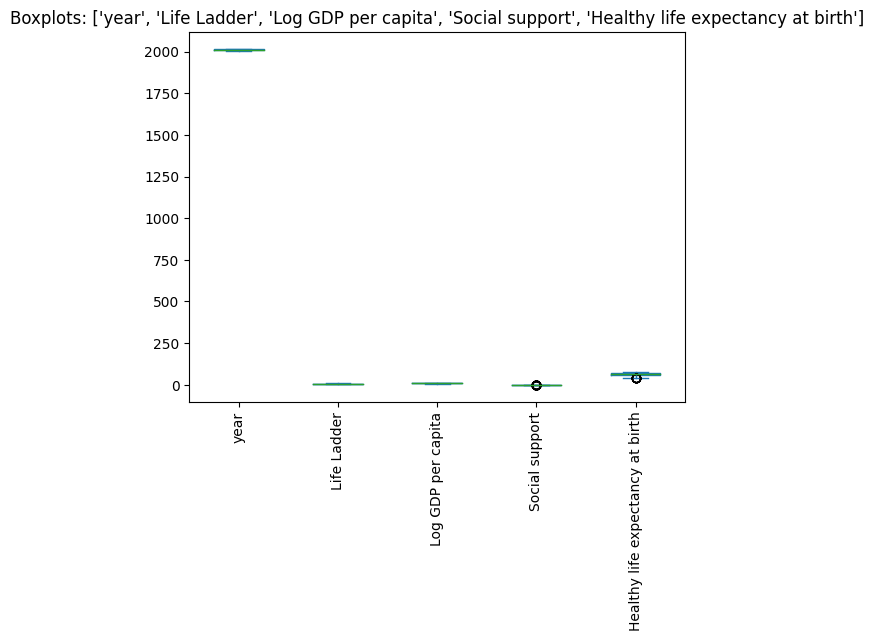

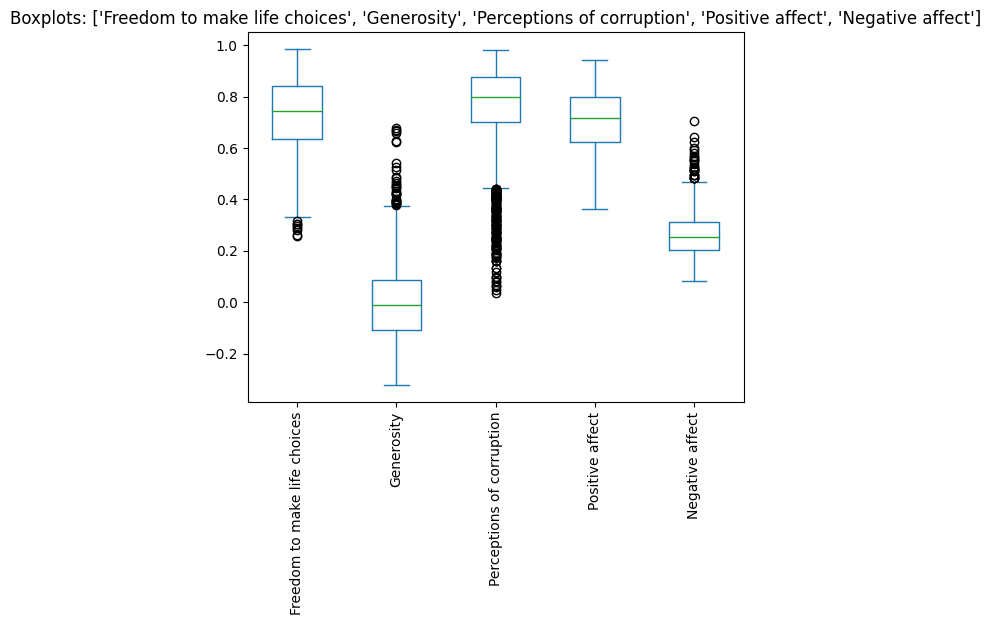

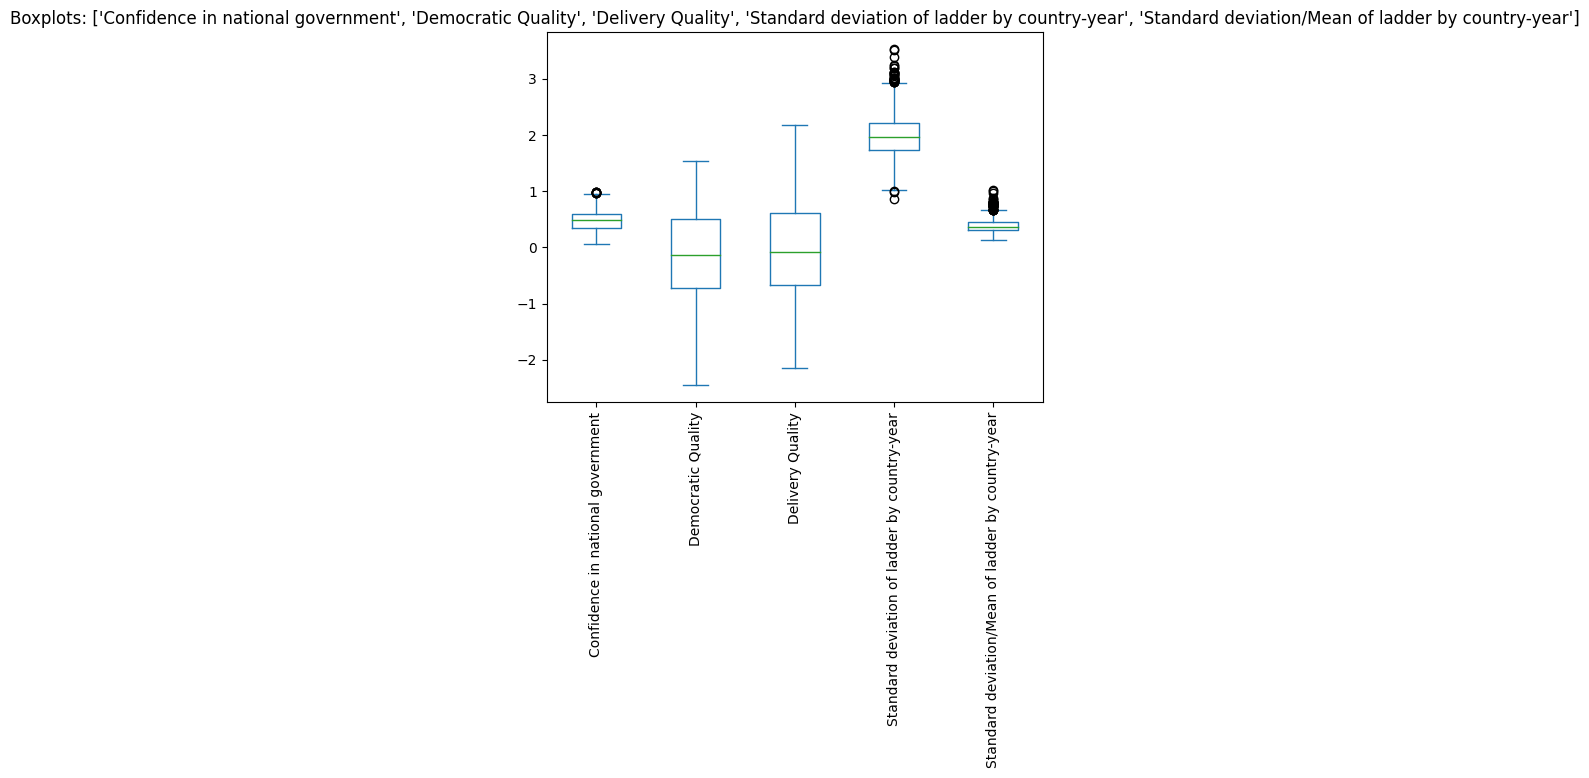

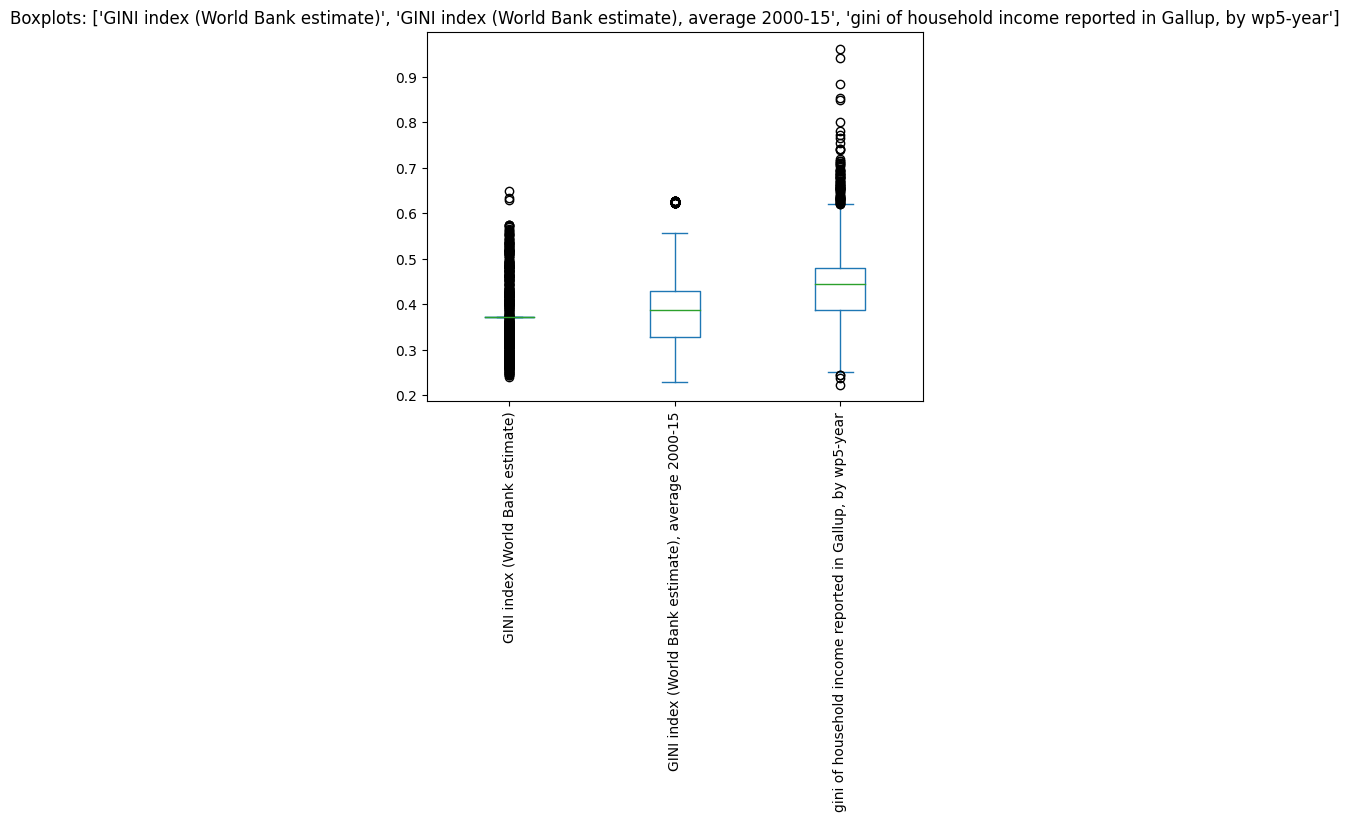

In [6]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()

for i in range(0, len(numeric_cols), 5):
    chunk = numeric_cols[i:i + 5]
    df[chunk].plot(kind='box', title=f"Boxplots: {chunk}")
    plt.xticks(rotation = 90)
    plt.show()

##### Note:
I am hesitant to drop these values because I think it's reasonable to have outliers in socioeconomic data, especially since there are a limited number of countries around the world with different qualities of life. I feel like removing extreme values will misrepresent countries with lower qualities of life.

#### Getting a Better Understanding of Life Ladder

In [7]:
print(df["Life Ladder"].describe())
df["Life Ladder"]

count    1562.000000
mean        5.433676
std         1.121017
min         2.661718
25%         4.606351
50%         5.332600
75%         6.271025
max         8.018934
Name: Life Ladder, dtype: float64


0       3.723590
1       4.401778
2       4.758381
3       3.831719
4       3.782938
          ...   
1557    4.690188
1558    4.184451
1559    3.703191
1560    3.735400
1561    3.638300
Name: Life Ladder, Length: 1562, dtype: float64

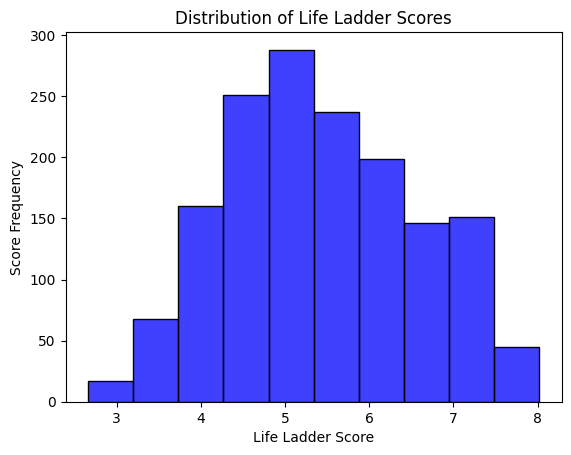

In [8]:
sns.histplot(df["Life Ladder"], bins = 10, color = 'blue')
plt.title("Distribution of Life Ladder Scores")
plt.xlabel("Life Ladder Score")
plt.ylabel("Score Frequency")
plt.show()

####  One-Hot Encoding "Country"

In [9]:
#df = pd.get_dummies(df, columns=['country'], prefix='country')

#### Understanding Life Ladder's Linear Correlation with Different Features

In [10]:
correlations = df.corr()["Life Ladder"].abs().sort_values(ascending=False)
correlations

Life Ladder                                                 1.000000
Log GDP per capita                                          0.772222
Standard deviation/Mean of ladder by country-year           0.756076
Healthy life expectancy at birth                            0.729544
Social support                                              0.697204
Delivery Quality                                            0.672152
Democratic Quality                                          0.577380
Positive affect                                             0.552625
Freedom to make life choices                                0.523331
Perceptions of corruption                                   0.417145
Negative affect                                             0.266959
gini of household income reported in Gallup, by wp5-year    0.258210
Generosity                                                  0.199116
GINI index (World Bank estimate), average 2000-15           0.163574
Standard deviation of ladder by co

I see that Log GDP per capita (0.772222) and Standard deviation/Mean of ladder by country-year (0.756076) are well correlated linearly (or negatively linear) with Life Ladder; so I think I'll add that to the features I will be using to train my model.

#### Dropping Features

In [11]:
columns_to_drop = [
    "gini of household income reported in Gallup, by wp5-year",
    "Generosity", # Might remove later
    "GINI index (World Bank estimate), average 2000-15",
    "Standard deviation of ladder by country-year",
    "Confidence in national government", # Might remove later
    "GINI index (World Bank estimate)",
    "year",
    "country",
    "Standard deviation/Mean of ladder by country-year"
]

df_cleaned = df.drop(columns = columns_to_drop)


#### Explanation:
    I dropped all GINI values becuase they all appear to have little to no correlation to 'Life Ladder', same with 'Generosity' and "Confidence in national government". I got rid of "Standard deviation of ladder by country-year" and "Standard deviation/Mean of ladder by country-year" because I was afraid of a data leak. I dropped "country" and "year" because it did not seem useful as is (that and I encoded country and saw there was little to no correlation with Life Ladder).

In [12]:
df_cleaned.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Democratic Quality,Delivery Quality
0,3.723590,7.168690,0.450662,49.209663,0.718114,0.881686,0.517637,0.258195,-1.929690,-1.655084
1,4.401778,7.333790,0.552308,49.624432,0.678896,0.850035,0.583926,0.237092,-2.044093,-1.635025
2,4.758381,7.386629,0.539075,50.008961,0.600127,0.706766,0.618265,0.275324,-1.991810,-1.617176
3,3.831719,7.415019,0.521104,50.367298,0.495901,0.731109,0.611387,0.267175,-1.919018,-1.616221
4,3.782938,7.517126,0.520637,50.709263,0.530935,0.775620,0.710385,0.267919,-1.842996,-1.404078


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

This is the new list of features:

    'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Democratic Quality', 'Delivery Quality']
      
I handled missing values. Checked the distributon of Life ladder to see if there were hints of a possible outlier,

Models I am thinking of using are Linear Regression and I'll use R² Score and RMSE (Root Mean Squared Error) to evaluate performance.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [13]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

#### Defining X and y 

In [14]:
X = df_cleaned.drop(columns=["Life Ladder"])
y = df_cleaned["Life Ladder"]

#### Splitting the Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

#### Applying Standard Scaling

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Training the Linear Regression Model

In [17]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

#### Making Predictions

In [18]:
y_pred = lr.predict(X_test_scaled)

#### Evaluating the Model

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R² Score: 0.7741503690166692
RMSE: 0.5414879262272357
MAE: 0.4204547156879032


##### What Are Our Evaluation Metrics?

    * R-squared: Tells us how much of the variance of the label can be explained by the model. If it is closer to 1 the better.
    * Root Mean Squared Error (RMSE):  Tells us how far off our predictions are on average. The lower the better.
    * Mean Absolute Error (MAE): Tells us the average of the absolute differences between actual and predicted values, lets us know how wrong we are.  The lower the better.

##### Explaining Our Evaluation Metrics:

    * Regarding R-squared, approximately 77% of the variation in Life Ladder scores is explained by our model, which is pretty strong. 
    * Concerning our RMSE, our predictions are about 0.54 points off from the true Life Ladder scores. 
    * Now with MAE, Our predictions on average are about 0.42 points off from the actual values. 

#### Actual vs. Predicted Life Ladder

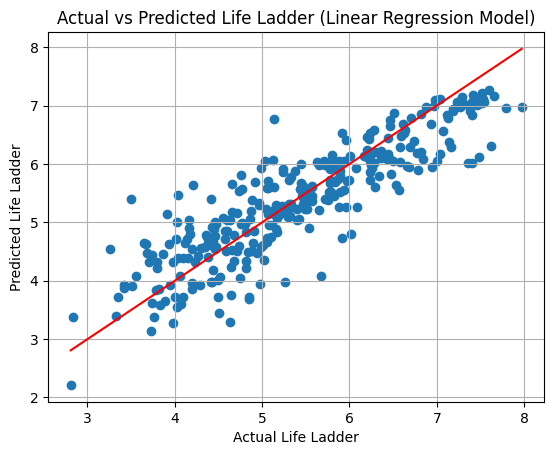

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Life Ladder")
plt.ylabel("Predicted Life Ladder")
plt.title("Actual vs Predicted Life Ladder (Linear Regression Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red')
plt.grid()
plt.show()

#### Explanation:
    There's clustering around the red line which aligns with our R-squared; being somewhat close to the actual values. There's some spread which can mean there's some underfitting. The model doesn't seem to cluster all in one area, so it does not seem to overpredict or underpredict, which is good (low bias).

#### What Next?
    Moving forward, I think I would like to see how the Random Forest Regressor  handles the data and make predictions.

#### Random Forest Regressor and XGBoost Regressor Libraries

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#### Training the Random Forest Regressor Model and Making Predictions

In [22]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

#### Evaluating the Random Forest Regressor Model

In [23]:
r2 = r2_score(y_test, rf_predictions)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
mae = mean_absolute_error(y_test, rf_predictions)

print(f"Random Forest R² Score: {r2}")
print(f"Random Forest RMSE: {rmse}")
print(f"Random Forest MAE: {mae}")

Random Forest R² Score: 0.898951587924633
Random Forest RMSE: 0.36219615145760814
Random Forest MAE: 0.28357257260824287


##### Explaining Our Evaluation Metrics:

    * Regarding R-squared, approximately 89% of the variation in Life Ladder scores is explained by our model, which is amazing (better than the Linear Regression model).
    * For our RMSE, our predictions are about 0.36 points off from the true Life Ladder scores (better than the Linear Regression model).
    * Now with MAE, Our predictions on average are about 0.28 points off from the actual values (also better than the Linear Regression model).

#### Actual vs. Predicted Life Ladder (Random Forest Regressor Model)

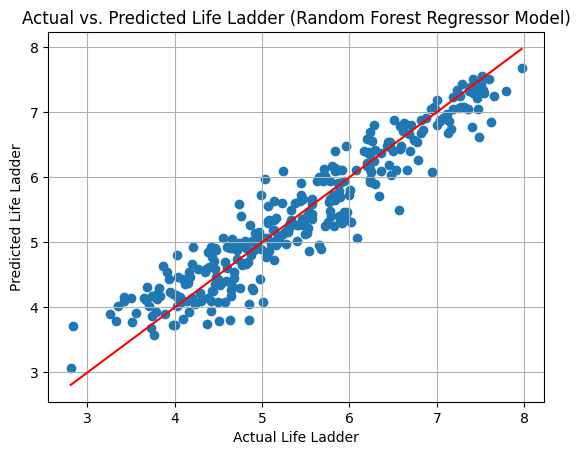

In [24]:
plt.scatter(y_test, rf_predictions)
plt.xlabel("Actual Life Ladder")
plt.ylabel("Predicted Life Ladder")
plt.title("Actual vs. Predicted Life Ladder (Random Forest Regressor Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red')
plt.grid()
plt.show()

#### Training the Gradient Boosting Regressor Model and Making Predictions

In [25]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
gbr_predictions = gbr.predict(X_test)

In [26]:
r2 = r2_score(y_test, gbr_predictions)
rmse = np.sqrt(mean_squared_error(y_test, gbr_predictions))
mae = mean_absolute_error(y_test, gbr_predictions)

print(f"Gradient Boosting Regressor R² Score: {r2}")
print(f"Gradient Boosting Regressor RMSE: {rmse}")
print(f"Gradient Boosting Regressor MAE: {mae}")

Gradient Boosting Regressor R² Score: 0.8582340684315809
Gradient Boosting Regressor RMSE: 0.42900763644715517
Gradient Boosting Regressor MAE: 0.3392728797284105


##### Explaining Our Evaluation Metrics:
Random Forest performed the best across all metrics it had the highest R-squared which explains the ~89.9% of the variance in the target variable.

#### Actual vs. Predicted Life Ladder (Gradient Boosting Regressor Model)

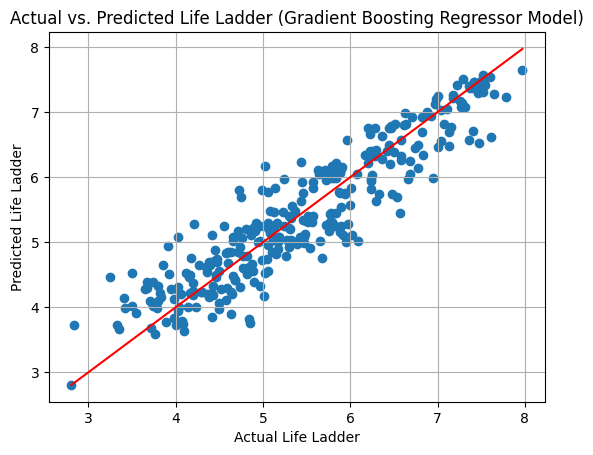

In [27]:
plt.scatter(y_test, gbr_predictions)
plt.xlabel("Actual Life Ladder")
plt.ylabel("Predicted Life Ladder")
plt.title("Actual vs. Predicted Life Ladder (Gradient Boosting Regressor Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red')
plt.grid()
plt.show()

#### What Next?
I am very satisfied with our metrics (Random Forest). I want to understand what is driving our model, so I will look at feature importance.

                            Feature  Importance
0                Log GDP per capita    0.395270
2  Healthy life expectancy at birth    0.311637
5                   Positive affect    0.090917
1                    Social support    0.070490
7                Democratic Quality    0.044593
4         Perceptions of corruption    0.024274
3      Freedom to make life choices    0.022990
6                   Negative affect    0.022665
8                  Delivery Quality    0.017164


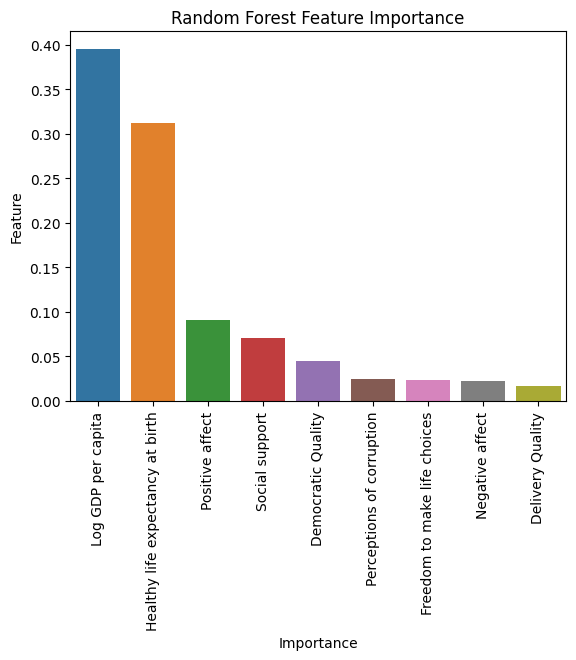

In [28]:
importances = rf_model.feature_importances_

feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

sns.barplot(x = 'Feature', y = 'Importance', data = feature_importance_df)
plt.title("Random Forest Feature Importance")
plt.xticks(rotation = 90)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

##### Note:
I know it is not shown here, but I caught a feature that was possibly leaking data, "Standard deviation/Mean of ladder by country-year" (The name is very similar to another feature hence the miss). The feature is closely related to the label "Life Ladder", so I thought it would be best to remove the feature from the training and test data. Metrics were looking a bit better before. Concerning the feature importance, I may account for outliers of the features with seemingly lower importance. Especially if optimization proves fruitless.

#### Grid Search Libraries

In [31]:
from sklearn.model_selection import GridSearchCV

#### Defining the Hyperparameter Grid

In [32]:
param_grid = {
    'n_estimators': [50, 100], # 50, 100, 300, 400, 500 100, 200
    'max_depth': [ 10, 20, 30, None],
    'min_samples_split': [ 2, 4, 6], # 4, 5, 8, 2,  6,  10
    'min_samples_leaf': [1, 2, 3] # 3, 2, 4
}

Note: I got very tired of waiting, so I reduced the hyperparameter grid (Sorry :/ )

"Sigh". The metrics were worse, so I guess I am waiting.

In [33]:
rf = RandomForestRegressor(random_state = 1234)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)
grid_search.fit(X_train, y_train)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
y_pred_optimized = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred_optimized)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
mae = mean_absolute_error(y_test, y_pred_optimized)

print(f"Optimized R² Score: {r2}")
print(f"Optimized RMSE: {rmse}")
print(f"Optimized MAE: {mae}")

Optimized R² Score: 0.898019880526454
Optimized RMSE: 0.36386211785511186
Optimized MAE: 0.28657789237456127


##### Explaining Our Evaluation Metrics:

   It appears the original model (random forest) performed better than the optimized version. So, the original model was already well tuned, or the parameters were not explored enough. I did switch between parameter values to get a sense of how the metrics would change, but it proved fruitless. The original model explains around ~90% of the variance in the target variable; this is strong.

#### Moving Forward
If I had more time, I think I continue playing around with the hyperparameters. The less n_estimators, the number of trees in the ensemble, the better the Random Forest seemed to perform. I would address outliers and see how my metrics would differ. I would also attempt to gain a better understanding of the features, to make more informed decisions on feature selection.